In [202]:
%config IPCompleter.greedy=True
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

Cargamos algunas libreria que necesitaremos.

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import StratifiedKFold 
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder

Leémos nuestro dataset de la siguiente url:

In [4]:
URL = "https://raw.githubusercontent.com/oscar-unir/TIA/main/Laboratorio_dataset_car.csv"
df = pd.read_csv(URL, sep = ";")

Imprimimos las primeras filas para ver que aspecto tiene.

In [5]:
df.head()

,Buying,Maintenance,Doors,Person,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### PREPOCESAMIENTO DE DATOS

Tenemos un dataset con los datos de tipos de vehículos donde existen los siguientes aributos: 

- buying: Precio del coche. Valores: vhigh, high, med, low.
- maint: Precio de mantenimiento. Valores: vhigh, high, med, low.
- doors: Número de puertas. Valores: 2, 3, 4, 5more.
- persons: Número de pasajeros. Valores: 2, 4, more.
- lug_boot: Tamaño del maletero. Valores: small, med, big.
- safety: Seguridad del coche. Valores: high, med, low

y la variable de clase es: 
- class: indica si el coche es aceptable o no.

Vemos el tamaño del dataset.Este tiene 1750 filas y 7 columnas.

In [6]:
df.shape

(1750, 7)

Tipos de datos por columna:

In [7]:
df.dtypes

Buying         object
Maintenance    object
Doors          object
Person         object
lug_boot       object
safety         object
class          object
dtype: object

Imprimimos una tabla con la descripción del dataset

In [8]:
df.describe()

,Buying,Maintenance,Doors,Person,lug_boot,safety,class
count,1750,1750,1750,1750,1750,1750,1750
unique,4,4,4,3,3,3,4
top,vhigh,low,2,4,big,high,unacc
freq,443,447,444,587,585,590,1215


La fila 'count' nos hace un recuento de filas o instancias del dataset, la fila 'unique' nos indica el número de valores diferentes que toma cada fila, la fila 'top' indica qué instancias es la mayoritaria entre todas por columna, y, la fila 'freq' nos indica el número de veces que se repite ese valor que nos indica la tabla en la fila 'top'.

Veamos de otro modo el número de instancias que tiene el dataset. Debe coincider el lo que nos indicaba la función .shape() y la columna 'count' que nos daba la función .describe() más arriba vistas.

In [11]:
len(df.index)

1750

Veamos qué clases tiene la columna objetivo o de clase 'class'

In [10]:
n_clases= df["class"].unique().tolist()
n_clases

['unacc', 'acc', 'vgood', 'good']

Las clases indican la valoración final del vehículo pudiendo tener los siguientes valores:

- unacc: inaceptables
- acc: aceptables
- vgood: muy bueno
- good: bueno

Será nuestra variable objetivo.

Y los valores del resto de columnas son:

In [12]:
all_columns_list = df.columns.values.tolist()
valores =[]
for i in range(len(all_columns_list)):    
    print(df.columns[i], df[all_columns_list[i]].unique().tolist())

Buying ['vhigh', 'high', 'med', 'low']
Maintenance ['vhigh', 'high', 'med', 'low']
Doors ['2', '3', '4', '5more']
Person ['2', '4', 'more']
lug_boot ['small', 'med', 'big']
safety ['low', 'med', 'high']
class ['unacc', 'acc', 'vgood', 'good']


Los atributos y sus significados son las siguientes:

- Buying: indica el precio del vehículo.
- Maintenance: indica si el precio de mantenimiento.
- Doors: número de puertas del vehículo.
- Person: indica el número de pasajeros que puede transportar el vehículo.
- lug_boot: nos indica el tamaño del maletero.
- safety: indica el nivel de seguridad del vehículo.

Contabilicemos el número de instancias de la columna clase y de las columnas atributos.

In [13]:
D1 = pd.DataFrame(df["Buying"].value_counts())
D2 = pd.DataFrame(df["Maintenance"].value_counts())
D3 = pd.DataFrame(df["Doors"].value_counts())
D4 = pd.DataFrame(df["Person"].value_counts())
D5 = pd.DataFrame(df["lug_boot"].value_counts())
D6 = pd.DataFrame(df["safety"].value_counts())
D7 = pd.DataFrame(df["class"].value_counts())
n_instancias = pd.concat([D1, D2, D3, D4, D5, D6, D7], axis=1)
n_instancias.fillna(0)

,Buying,Maintenance,Doors,Person,lug_boot,safety,class
vhigh,443.0,437.0,0.0,0.0,0.0,0.0,0.0
med,438.0,434.0,0.0,0.0,583.0,582.0,0.0
low,437.0,447.0,0.0,0.0,0.0,578.0,0.0
high,432.0,432.0,0.0,0.0,0.0,590.0,0.0
2,0.0,0.0,444.0,578.0,0.0,0.0,0.0
5more,0.0,0.0,437.0,0.0,0.0,0.0,0.0
3,0.0,0.0,435.0,0.0,0.0,0.0,0.0
4,0.0,0.0,434.0,587.0,0.0,0.0,0.0
more,0.0,0.0,0.0,585.0,0.0,0.0,0.0
big,0.0,0.0,0.0,0.0,585.0,0.0,0.0


Lo podemos ver un poco más ordenado de esta manera:

In [15]:
for i in range(len(all_columns_list)):
       print(df[all_columns_list[i]].value_counts())

vhigh    443
med      438
low      437
high     432
Name: Buying, dtype: int64
low      447
vhigh    437
med      434
high     432
Name: Maintenance, dtype: int64
2        444
5more    437
3        435
4        434
Name: Doors, dtype: int64
4       587
more    585
2       578
Name: Person, dtype: int64
big      585
med      583
small    582
Name: lug_boot, dtype: int64
high    590
med     582
low     578
Name: safety, dtype: int64
unacc    1215
acc       390
good       75
vgood      70
Name: class, dtype: int64


Aunque sea redundate obtengo el número de instacias por clase para verlo a parte. Puedo ver claramente que tengo un dataset desbalaceado. Hay una gran diferencia en el número de clases de tipo 'unacc' con respecto al resto.

In [16]:
pd.DataFrame(df["class"].value_counts())

,class
unacc,1215
acc,390
good,75
vgood,70


Veamos si existen valores desconocidos en el dataset:

In [17]:
df.isnull().values.any()

False

Vemos que no tenemos valores nulos.

## EVALUACIÓN DE ALGORITMOS

Para la evaluación de los algoritmos primero vamos a pasar las instancias a formato one-hot encoding con la función .factorize de pandas.

In [18]:
for i in range(len(all_columns_list)):
    df[all_columns_list[i]] = pd.factorize(df[all_columns_list[i]])[0]
df

,Buying,Maintenance,Doors,Person,lug_boot,safety,class
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...
1745,3,3,3,2,1,2,2
1746,3,3,3,2,1,2,2
1747,3,3,3,2,2,0,0
1748,3,3,3,2,2,1,3


In [50]:
for i in range(len(all_columns_list)):
       print(df[all_columns_list[i]].value_counts())

0    443
2    438
3    437
1    432
Name: Buying, dtype: int64
3    447
0    437
2    434
1    432
Name: Maintenance, dtype: int64
0    444
3    437
1    435
2    434
Name: Doors, dtype: int64
1    587
2    585
0    578
Name: Person, dtype: int64
2    585
1    583
0    582
Name: lug_boot, dtype: int64
2    590
1    582
0    578
Name: safety, dtype: int64
0    1215
1     390
3      75
2      70
Name: class, dtype: int64


Realizamos una representación de cajas de las distintas columnas del dataset:

<Figure size 288x288 with 0 Axes>

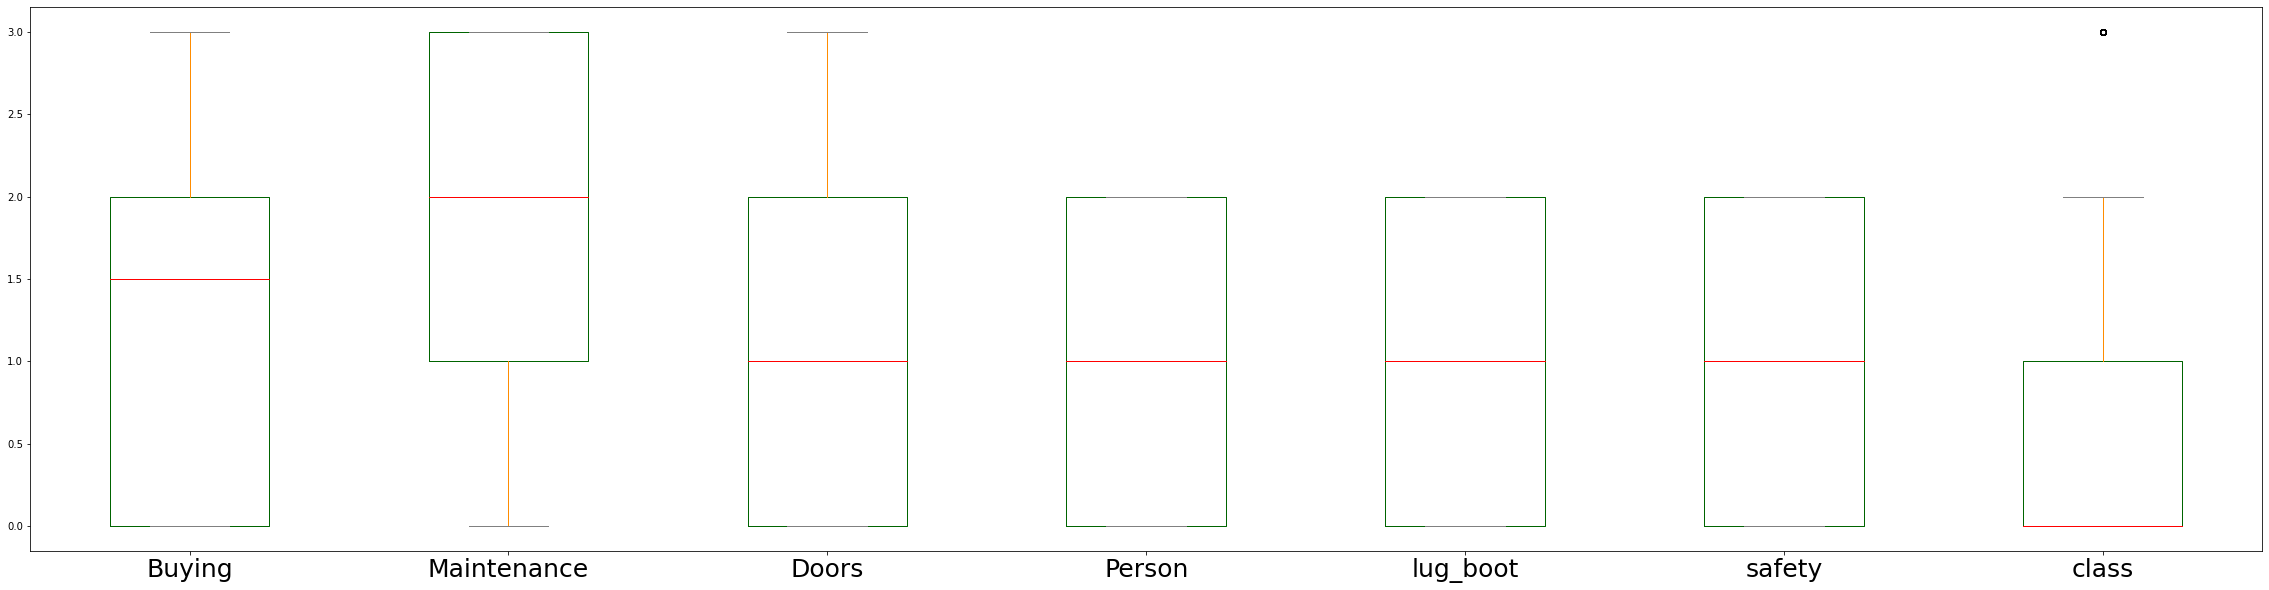

In [54]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import matplotlib 
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='Red', caps='Gray')
plt.figure(figsize=(4,4))
df.plot(kind = "box", subplots = False, layout = (1,7), sharex = False, sharey = False, figsize=(40,10), color=color)
plt.show()

Observamos que los atributos 'Person', 'lug_boot' y 'safety' están muy balanceados ya que estos solo tomaban valores 0, 1 y 2 y vemos que en terminos generales las posibilidad tienen el mismo valor. Esto nos indica que podrían ser atributos a no tener en cuenta a la hora de realizar predicciones aunque en nuestro caso no vamos a prescindir de ellos.

Los atributos 'Buying' y 'Door' toman casi todos sus valores entre 0, 1 y 2, teniendo unos máximos en 3 que tienen menos ocurrencia. Por ejemplo, en el caos de 'Buying', observamos que en el dataset existen 438 de bajo coste (valor 3 en el eje 'y' del gráfico), 438 de medio coste (valor 2), 432 de alto coste (valor 1), y por último, y un poco por encima de estos (de ahí que el exista tanta distancia entre el primer cuartil y la media en la caja), 443 con muy alto coste (que toma el valor 0 en este caso) hace que la caja se desbalancee muchos hacia los mínimos. Para el caso de la variable 'Doors' podemos hacer la misma reflexión.

El atributo 'Maintenance' nos indica que hay más coches con el precio de mantenimiento entre valores bajos y medios.

Como ya vimos anteriormente respecto a la clase 'class', están muy desbalanceada hacia los valores mínimos indicandonos la caja que la mayoría de coches del dataset son inaceptables como nos indica la coincidencia del bigote mínimo, el primer cuartil y la media.

Divido nuestro dataset en dos, uno con los valores de los atributos y el otro con el de las clases para comenzar a entrenar nuestros modelos.

In [57]:
array_df = df.values
X = array_df[:, 0:6]
y = array_df[:, 6]

Dividimos el dataset en dos, 80% para entrenamiento, 20% para test

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, shuffle = True)

Comprobamos que tenemos la proporción de 80-20:

In [59]:
print("X_train:", X_train.shape, ", X_test:", X_test.shape)
print("y_train:", y_train.shape, ", y_test:", y_test.shape)

X_train: (1400, 6) , X_test: (350, 6)
y_train: (1400,) , y_test: (350,)


Importamos los algoritmos a probar

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

Cargamos los algoritmos

In [61]:
models = []

# LogisticRegression
models.append(("LR", LogisticRegression(solver="liblinear", multi_class="ovr")))
# Tras probar varios parámetros no se han encontrado cambios significativos en los resultados.

# DecisionTreeClassifier (CART) con método de selección de atributos: indice Gini por defecto.
models.append(('CART', DecisionTreeClassifier()))
# DecisionTreeClassifier (ID3) con método de selección de atributos: Entropia.
models.append(('ID.3', DecisionTreeClassifier(criterion="entropy")))
# Tras probar todos los parámetros no se han encontrado cambios en los resultados. Tampoco existe cambio alguno al cambiar el tipo de método de selección de atributos.

# Stacking.
# Creamos la tupla 'estimators' con los estimadores que usaremos en el Stacking.
estimators = [("LR", LogisticRegression(solver="liblinear", multi_class="ovr")),('CART', DecisionTreeClassifier())]
# Divisiones para nuestra técnica de cross-validation a usar en el dos modelos de Stacking.
kfold = StratifiedKFold(n_splits=10, random_state=None)
# Stacking con algoritmo de salida - Regresión LOgistica
models.append(("Stacking_LR", StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=kfold)))
# Stacking con algoritmo de salida - CART
models.append(("Stacking_CART", StackingClassifier(estimators=estimators, final_estimator=DecisionTreeClassifier(), cv=kfold)))
# En este caso se aprecia un muy pequeño cambio si usamos un algoritmo u otro para la salida de nuestro Stacking. También se observa que si modificamos la estrategia de 
# validación cruzada vemos que con un número de division de 10 en el segundo caso mejora la precision del 74% al 76%.

# Bagging.
models.append(("Bagging_DecisionTreeClassifier", BaggingClassifier(DecisionTreeClassifier(),n_estimators = 10,random_state = 25)))
models.append(("Bagging_LogisticRegression", BaggingClassifier(LogisticRegression(solver="liblinear", multi_class="ovr"),n_estimators = 100,random_state = 0)))
# Se aprecia un pequeño cambio al modificar el número de estimadores mejorando la precisión según se disminuye este. Tampoco existe cambio al cambiar el tipo de algoritmo.

# RandomForestClassifier - equivalente a BaggingClassifier con el parámetreo base_estimatos = None
models.append(("Bagging_RandomForestClassifier", RandomForestClassifier(n_estimators=10, random_state= 1, max_depth = 100)))

Evaluamos cada modelo por turnos con el número de divisiones en la validación cruzada en 10.

In [71]:
results = []
names =[]
print("Valores acuracy en el entrenamiento:\n")
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: Media: %f - Desviación estándas: %f' % (name, cv_results.mean(), cv_results.std()))

Valores acuracy en el entrenamiento:

LR: Media: 0.769286 - Desviación estándas: 0.018640
CART: Media: 0.977857 - Desviación estándas: 0.009820
ID.3: Media: 0.980714 - Desviación estándas: 0.010127
Stacking_LR: Media: 0.977857 - Desviación estándas: 0.010809
Stacking_CART: Media: 0.967857 - Desviación estándas: 0.014375
Bagging_DecisionTreeClassifier: Media: 0.978571 - Desviación estándas: 0.011518
Bagging_LogisticRegression: Media: 0.770000 - Desviación estándas: 0.019640
Bagging_RandomForestClassifier: Media: 0.960714 - Desviación estándas: 0.007319


Comparación de algorítmos graficamente.

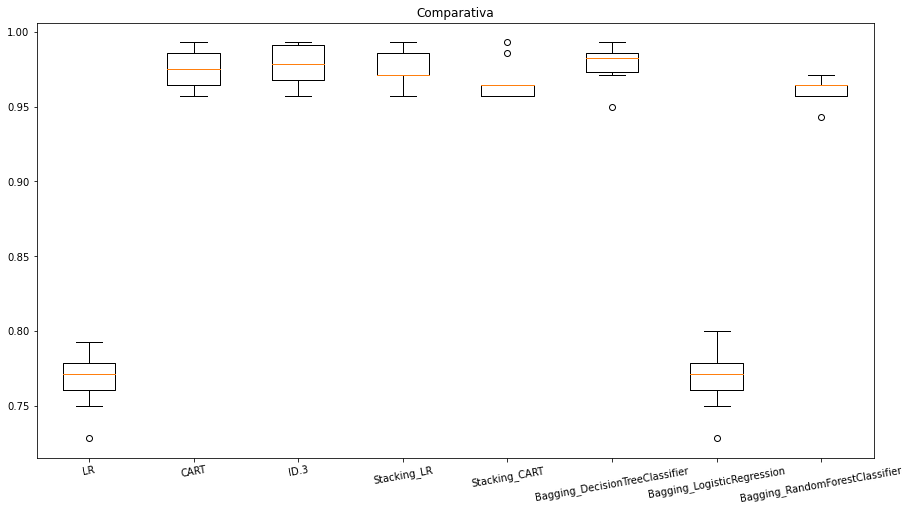

In [69]:
plt.figure(figsize=(15,8))
plt.boxplot(results, labels=names)
plt.title("Comparativa")
plt.xticks(rotation=10, fontsize = 10)
plt.show()

Evaluamos cada modelo por turnos con nummero de divisiones n_splits = 50

In [72]:
results = []
names =[]
print("Valores acuracy en el entrenamiento:\n")
for name, model in models:
    kfold = StratifiedKFold(n_splits=50, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: Media: %f - Desviación estándas: %f' % (name, cv_results.mean(), cv_results.std()))

Valores acuracy en el entrenamiento:

LR: Media: 0.771429 - Desviación estándas: 0.046839
CART: Media: 0.977857 - Desviación estándas: 0.025645
ID.3: Media: 0.980714 - Desviación estándas: 0.023915
Stacking_LR: Media: 0.979286 - Desviación estándas: 0.023787
Stacking_CART: Media: 0.965000 - Desviación estándas: 0.034619
Bagging_DecisionTreeClassifier: Media: 0.980714 - Desviación estándas: 0.024959
Bagging_LogisticRegression: Media: 0.770714 - Desviación estándas: 0.045226
Bagging_RandomForestClassifier: Media: 0.967143 - Desviación estándas: 0.033381


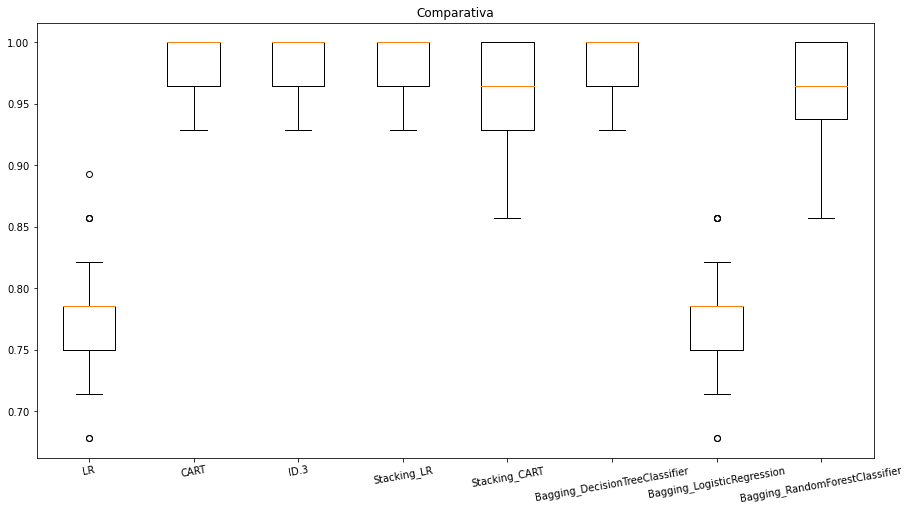

In [75]:
plt.figure(figsize=(15,8))
plt.boxplot(results, labels=names)
plt.title("Comparativa")
plt.xticks(rotation=10, fontsize = 10)
plt.show()

Vemos que, en terminos generales, para todos los modelos mejoran los resultados si tomamos más divisiones para la técnica de cross-validation. Ya no aparecen tantos outliers en los diferentes modelos teniendo en cuenta las 50 divisiones. Por contra, el rendimiento del ordenador a la hora de calcular los modelos se ha visto incremento.

Podemos observar que tanto el algoritmo LR como el Bagging_LogisticRegression tiene un bajo accuracy frente al resto. 

Los más balanceados o con menos desviaciones parecen ser el CART, el ID.3, el Stacking_LR y el Bagging_DecisionTreeClassifier, teniendo muy buenos valores el CART y el Stacking_LR.

Para el cálculo de las predicciones vamos a tomar los tres con mayor accuracy, es decir, ID.3, Bagging_DecisionTreeClassifier, Stacking_LR.

Vamos a calcular las predicciones de cada modelo y vamos a plasmar los resultados en una matriz de confusión.

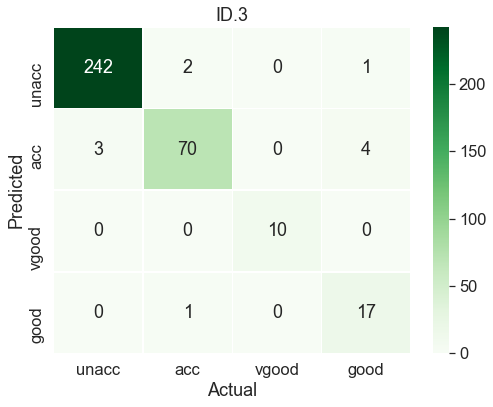

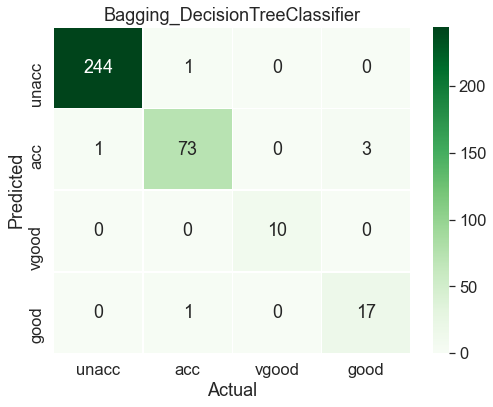

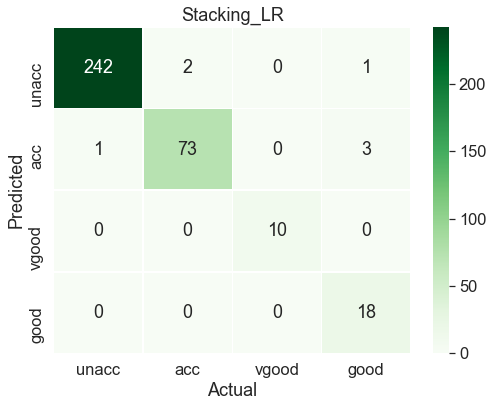

In [76]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
models_pred = []
models_pred.append(('ID.3', DecisionTreeClassifier(criterion="entropy")))
models_pred.append(("Bagging_DecisionTreeClassifier", BaggingClassifier(DecisionTreeClassifier(),n_estimators = 10,random_state = 25)))
models_pred.append(("Stacking_LR", StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=kfold)))

for name, model in models_pred:
    labels = ['unacc', 'acc', 'vgood', 'good']
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    names.append(name)
    
    sns.set(font_scale=1.5)
    plt.figure(figsize=(8,6))
    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cm,# PASAMOS LOS DATOS GENERADOS
            annot=True, # QUEREMOS QUE HAGA ANOTACIONES (PONGA EL VALOR EN LAS CELDAS)
            fmt='d', # FORMATO EN DIGITOS NO FLOTANTES
            xticklabels=labels,
            yticklabels=labels,linewidths=0.5, 
            cmap='Greens'
            )
    plt.title(name)
    plt.ylabel('Predicted')
    plt.xlabel('Actual');
    print(" ")

Obtenemos por pantalla el resumen de métricas con las funciones de sklearn 'classification_report' y 'accuracy_score'.

In [79]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 


for name, model in models_pred:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name) 
    print("Valores de acurary en el test:", accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))

ID.3
Valores de acurary en el test: 0.9628571428571429
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       245
           1       0.95      0.90      0.92        77
           2       1.00      1.00      1.00        10
           3       0.77      0.94      0.85        18

    accuracy                           0.96       350
   macro avg       0.93      0.96      0.94       350
weighted avg       0.96      0.96      0.96       350

Bagging_DecisionTreeClassifier
Valores de acurary en el test: 0.9828571428571429
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       245
           1       0.97      0.95      0.96        77
           2       1.00      1.00      1.00        10
           3       0.85      0.94      0.89        18

    accuracy                           0.98       350
   macro avg       0.95      0.97      0.96       350
weighted avg       0.98      0.98      0.98      

Se puede ver claramente que para el modelo Bagging_DecisionTreeClassifier existen mejores métricas de clasificación.

Vamos a obtener la gráfica ROC para confirmar qué modelo clasifica mejor.

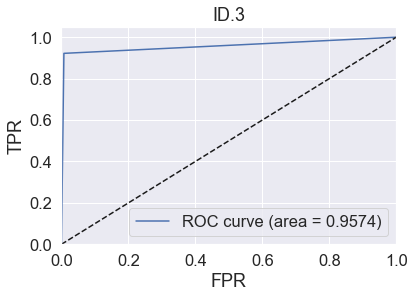

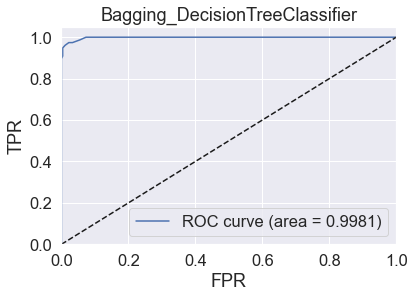

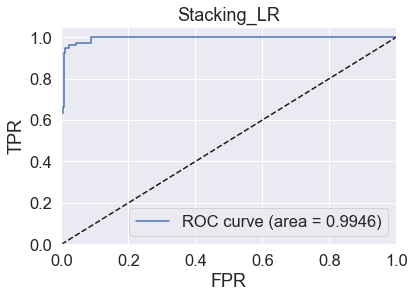

In [81]:
for name, model in models_pred:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    names.append(name)
    
    probs = model.predict_proba(X_test)
    
    probs = probs[:, 1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, probs, pos_label=1)
    
    
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.figure()
    
    plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title(name)
    plt.xlabel('FPR')
    plt.ylabel('TPR')    
    plt.legend(loc="lower right")
    
    plt.show()

Hagamos una representación visual del gráfico del árbol de regresión ID.3 para probar este tipo de visualización.

In [91]:
from sklearn import tree
import matplotlib.image as pltimg
import pydotplus

In [92]:
model = DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [93]:
data = tree.export_graphviz(model, out_file=None, feature_names=df.columns.values[0:6], class_names=['unacc', 'acc', 'vgood', 'good'], filled=True, rounded=True, special_characters=True)

In [94]:
graph = pydotplus.graph_from_dot_data(data)
# creo el archivo .png
graph.write_png('mydecisiontree.png')

True

In [95]:
img = pltimg.imread('mydecisiontree.png')

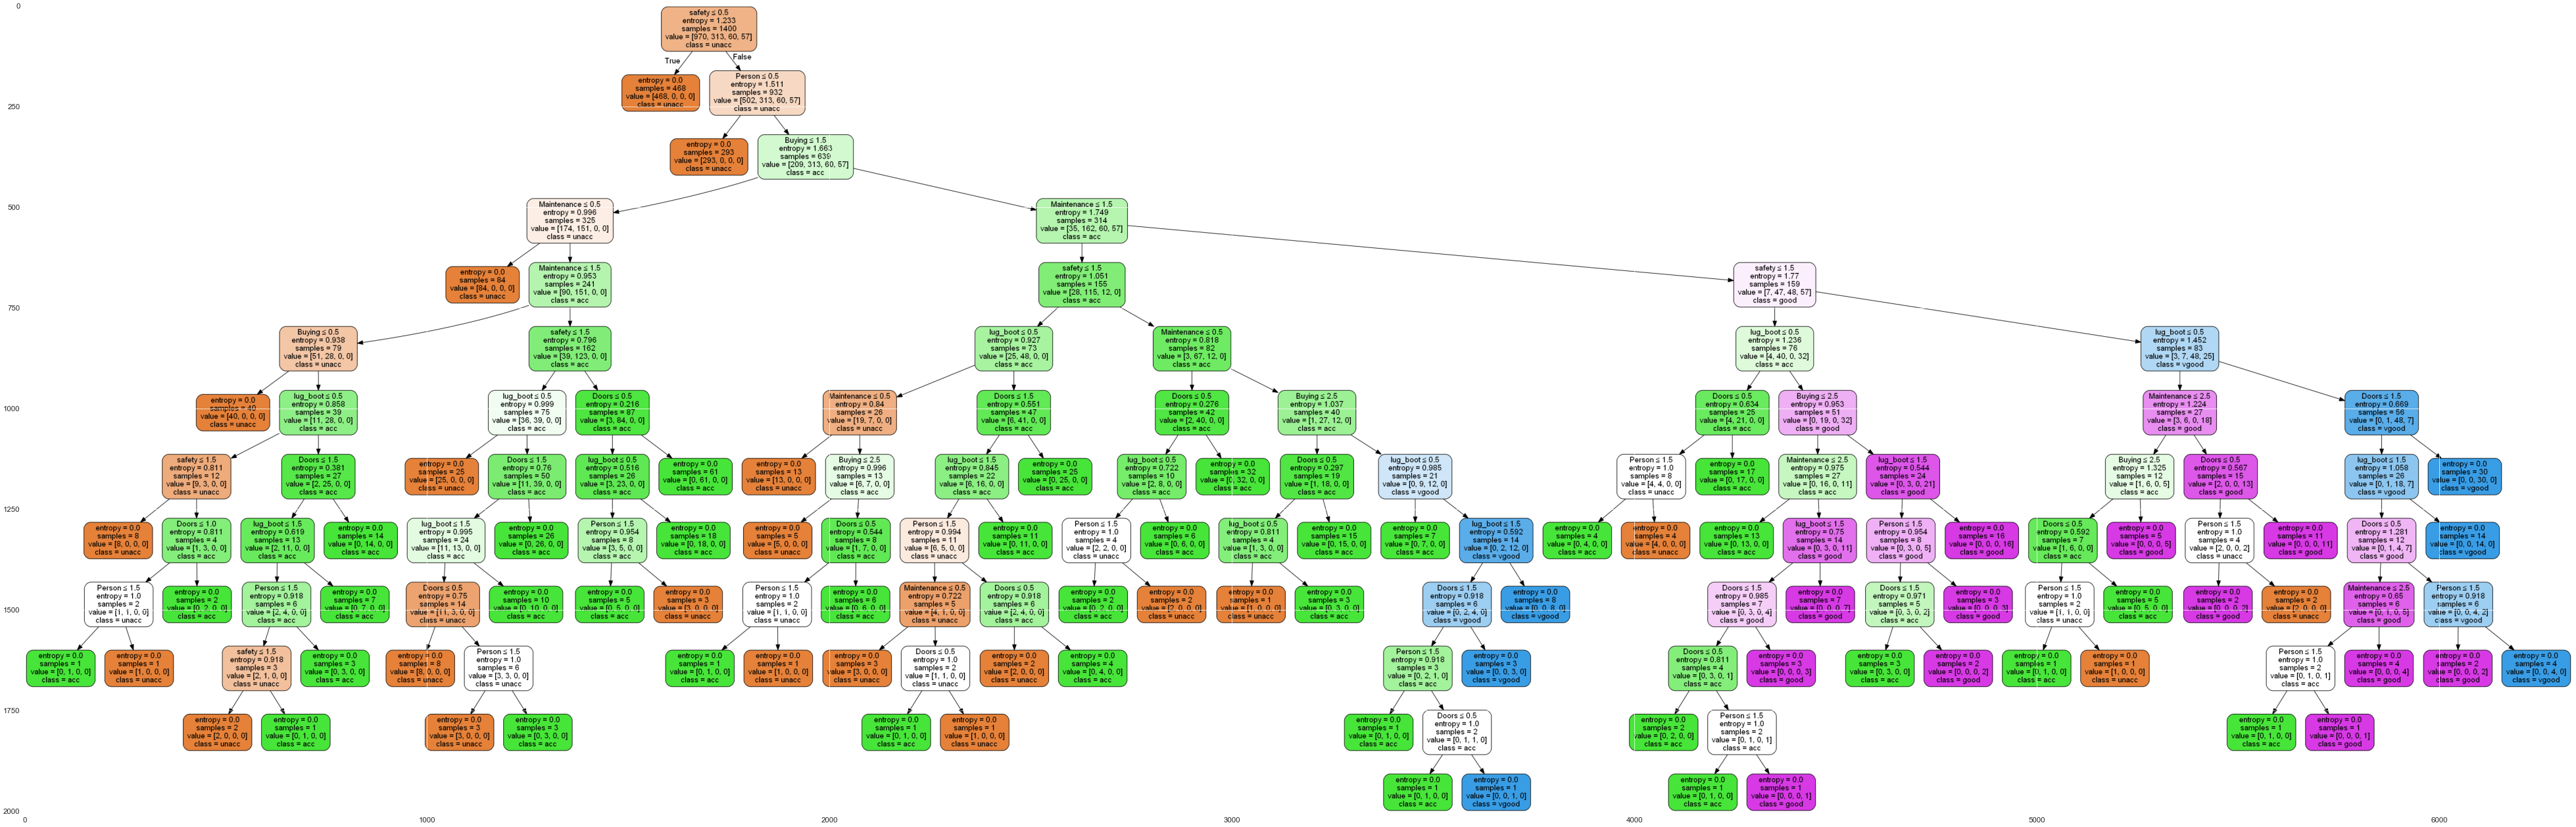

In [96]:
# creamos una plantilla para imprimir la imagen con el tamaño que queremos
plt.figure(figsize=(100,100), dpi=50)

# Creamos nuestra gráfica
imgplot = plt.imshow(img)
plt.show()